In [39]:
import pandas as pd
import numpy as np
from tqdm import tqdm
tqdm.pandas(desc="progress-bar")
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt

# EDA

In [30]:
appeal_PATH = "data/df_appeal.csv"
appeal = pd.read_csv(appeal_PATH)
appeal['noun'] = appeal['noun'].astype('str')
appeal.drop(columns=['Unnamed: 0', 'Unnamed: 0.1', 'tag'], inplace = True)
appeal.shape

(17992, 4)

In [31]:
appeal.head()

,id,decision,claims,noun
0,20130000011,Affirmed-in-Part,knit duallay fabric layer layer inner layer ad...,knit duallay layer layer inner layer contact w...
1,20130000031,Reversed,air inject system hydromassag bath bath bottom...,air system bath bath bottom wall peripher side...
2,20130000041,Affirmed,occup support support structur compon variabl ...,support support compon variabl profil actuat s...
3,20130000051,Reversed with new ground of rejection,compress tool jaw member jaw member pivot conn...,compress tool jaw member jaw member pivot jaw ...
4,20130000061,Reversed,rotat toothbrush handl provid lever head part ...,rotat toothbrush handl provid lever part brist...


In [32]:
Affirmed = appeal[appeal.decision=='Affirmed']
Reversed = appeal[appeal.decision=='Reversed']
appeal = pd.concat([Affirmed, Reversed])
appeal.shape

(15052, 4)

In [33]:
appeal['claims'][2]

'occup support support structur compon variabl profil actuat system vari variabl profil support structur control respons prescrib profil cycl paramet command actuat system effect cyclic variat variabl profil'

In [34]:
appeal['claims_length'] = 0
appeal['noun_length'] = 0
appeal['claims_unique'] = ""
appeal['noun_unique'] = ""
appeal['claims_unique_length'] = 0
appeal['noun_unique_length'] = 0
for i in tqdm(appeal.index):
    claims = appeal['claims'][i].split(' ')
    noun = appeal['noun'][i].split(' ')
    appeal['claims_length'][i] = len(claims)
    appeal['noun_length'][i] = len(noun)
    appeal['claims_unique'][i] = np.unique(claims)
    appeal['noun_unique'][i] = np.unique(noun)
    appeal['claims_unique_length'][i] = len(np.unique(claims))
    appeal['noun_unique_length'][i] = len(np.unique(noun))

100%|██████████| 15052/15052 [00:10<00:00, 1373.81it/s]


In [35]:
appeal.head()

,id,decision,claims,noun,claims_length,noun_length,claims_unique,noun_unique,claims_unique_length,noun_unique_length
2,20130000041,Affirmed,occup support support structur compon variabl ...,support support compon variabl profil actuat s...,28,21,"[actuat, command, compon, control, cycl, cycli...","[actuat, command, compon, control, cycl, effec...",18,13
5,20130000071,Affirmed,air suctioninject devic connect front end suct...,air devic connect end suction vacuum air devic...,119,74,"[air, airstream, bodi, cleaner, conjunct, conn...","[air, airstream, bodi, connect, creat, devic, ...",40,28
8,20130000101,Affirmed,cancel,cancel,1,1,[cancel],[cancel],1,1
9,20130000111,Affirmed,termin crimp apparatu plural applic includ die...,termin crimp includ die die crimp termin elect...,75,52,"[achiev, apparatu, applic, associ, away, base,...","[achiev, associ, base, connectiondisconnect, c...",34,24
10,20130000121,Affirmed,spheric cutter spheric shape bodi open end clo...,cutter shape bodi end end defin caviti multipo...,29,19,"[along, bodi, caviti, central, circular, close...","[bodi, caviti, cut, cutter, defin, dispos, end...",20,13


In [37]:
appeal = appeal[appeal.claims_length>1]
appeal = appeal[appeal.claims_length / appeal.claims_unique_length<=10]
appeal.shape

(14907, 10)

In [38]:
appeal.describe()

,id,claims_length,noun_length,claims_unique_length,noun_unique_length
count,1.490700e+04,14907.000000,14907.000000,14907.000000,14907.000000
mean,2.013715e+10,69.767626,49.292279,29.007849,21.631113
std,7.482135e+06,54.106487,38.756731,13.546710,10.100735
min,2.013000e+10,2.000000,2.000000,2.000000,2.000000
25%,2.013006e+10,39.000000,28.000000,20.000000,15.000000
50%,2.014001e+10,58.000000,42.000000,27.000000,20.000000
75%,2.014008e+10,85.000000,60.000000,35.000000,26.000000
max,2.015008e+10,1288.000000,1117.000000,240.000000,178.000000


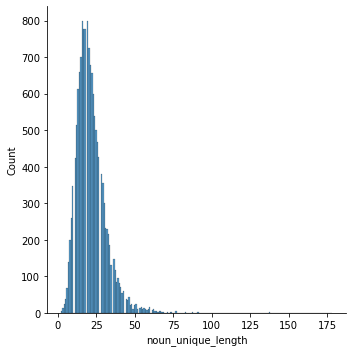

In [44]:
sns.displot(data = appeal, x='noun_unique_length')

# save corpus for word2vec

In [ ]:
#=